# Spatial Image Filtering

In this notebook, we will show how to use skimage for performing image enhancement.

In [1]:
%matplotlib inline
import skimage
import numpy as np
from matplotlib import pyplot as plt

<class 'numpy.ndarray'> float64 (512, 512)


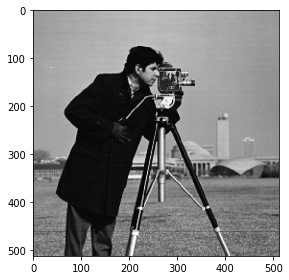

In [2]:
from skimage import data, img_as_float

image = img_as_float(data.camera())

print(type(image), image.dtype, image.shape)
plt.imshow(image, cmap='gray', interpolation='nearest');
plt.tight_layout()

## Generation of Noisy Image

<class 'numpy.ndarray'> float64 (512, 512)


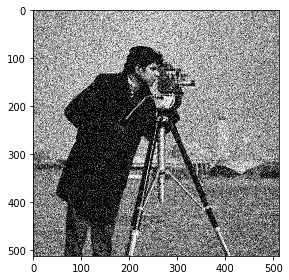

In [3]:
from skimage.util import random_noise

sigma = 0.155
noisy_image = random_noise(image, var=sigma**2)

print(type(noisy_image), image.dtype, image.shape)

plt.imshow(noisy_image, cmap='gray', interpolation='nearest');
plt.tight_layout()

## Mean and Guassian Filters

This example compares the following mean filters of the rank filter package:

Local Mean: all pixels belonging to the structuring element to compute average gray level.

Percentile Mean: only use values between percentiles p0 and p1 (here 10% and 90%).

Guassian filter: apply a Gaussian based weighted kernel


/Users/edmondpo/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


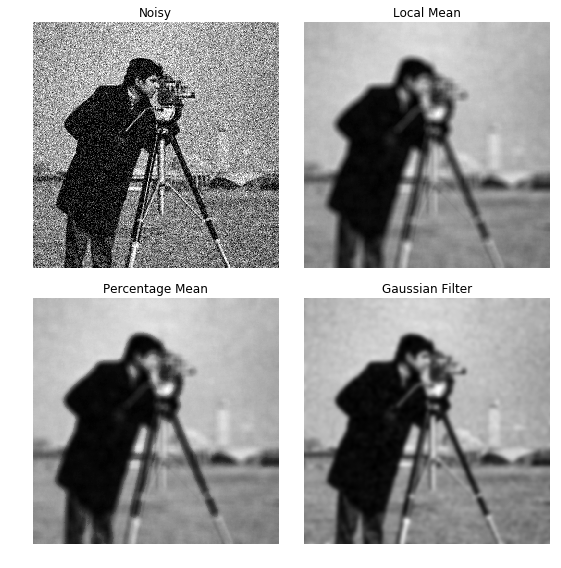

In [4]:
from skimage.morphology import disk
from skimage.filters import rank
from skimage import filters

selem = disk(10)

local_mean = rank.mean(noisy_image, selem=selem)

percentile_mean = rank.mean_percentile(noisy_image, selem=selem, p0=.1, p1=.9)

guassian_image = filters.gaussian(noisy_image, sigma=4)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex=True,
                       sharey=True)
plt.gray()

ax[0,0].imshow(noisy_image)
ax[0,0].axis('off')
ax[0,0].set_title('Noisy')

ax[0,1].imshow(local_mean)
ax[0,1].axis('off')
ax[0,1].set_title('Local Mean')

ax[1,0].imshow(percentile_mean)
ax[1,0].axis('off')
ax[1,0].set_title('Percentage Mean')

ax[1,1].imshow(guassian_image)
ax[1,1].axis('off')
ax[1,1].set_title('Gaussian Filter')

plt.tight_layout()

## Median Filter

Some noise is added to the image, 1% of pixels are randomly set to 255, 1% are randomly set to 0. The median filter is applied to remove the noise.

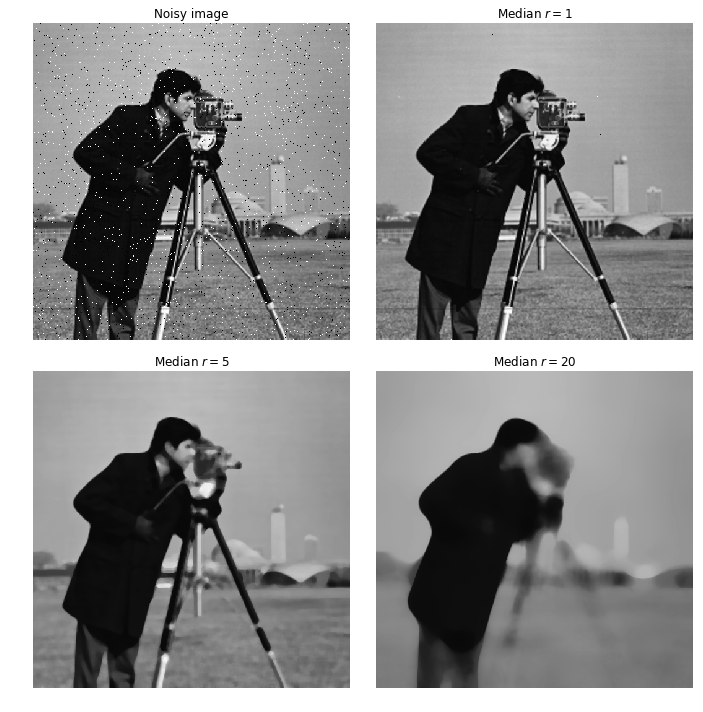

In [5]:
from skimage.filters.rank import median
from skimage.morphology import disk
from skimage import data, img_as_ubyte

noise = np.random.random(noisy_image.shape)
noisy_image = img_as_ubyte(data.camera())
noisy_image[noise > 0.99] = 255
noisy_image[noise < 0.01] = 0

fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(noisy_image, vmin=0, vmax=255, cmap=plt.cm.gray)
ax[0].set_title('Noisy image')

ax[1].imshow(median(noisy_image, disk(1)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[1].set_title('Median $r=1$')

ax[2].imshow(median(noisy_image, disk(5)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[2].set_title('Median $r=5$')

ax[3].imshow(median(noisy_image, disk(20)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[3].set_title('Median $r=20$')

for a in ax:
    a.axis('off')

plt.tight_layout()

The added noise is efficiently removed, as the image defaults are small (1 pixel wide), a small filter radius is sufficient. As the radius is increasing, objects with bigger sizes are filtered as well, such as the camera tripod. The median filter is often used for noise removal because borders are preserved and e.g. salt and pepper noise typically does not distort the gray-level.

## Advance Denoising Filters

In this example, we denoise a noisy version of a picture using the Guassian, total variation (TV), and bilateral denoising filters.

### Total Variation (TV)
Total variation and bilateral algorithms typically produce “posterized” images with flat domains separated by sharp edges. It is possible to change the degree of posterization by controlling the tradeoff between denoising and faithfulness to the original image.
Total variation filter

The result of this filter is an image that has a minimal total variation norm, while being as close to the initial image as possible. The total variation is the L1 norm of the gradient of the image.

### Bilateral Filter
A bilateral filter is an edge-preserving and noise reducing filter. It averages pixels based on their spatial closeness and radiometric similarity.


/Users/edmondpo/anaconda3/lib/python3.6/site-packages/skimage/filters/_gaussian.py:108: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))


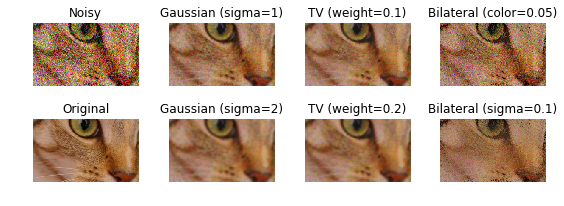

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import filters
from skimage.restoration import denoise_tv_chambolle
from skimage.restoration import denoise_bilateral

from skimage import data, img_as_float, color
from skimage.util import random_noise

original = img_as_float(data.chelsea()[100:250, 50:300])

sigma = 0.155
noisy = random_noise(original, var=sigma**2)

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(8, 3), sharex=True,
                       sharey=True)

plt.gray()

ax[0, 0].imshow(noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title('Noisy')

ax[0, 1].imshow(filters.gaussian(noisy, sigma=1))
ax[0, 1].axis('off')
ax[0, 1].set_title('Gaussian (sigma=1)')

ax[0, 2].imshow(denoise_tv_chambolle(noisy, weight=0.1, multichannel=True))
ax[0, 2].axis('off')
ax[0, 2].set_title('TV (weight=0.1)')

ax[0, 3].imshow(denoise_bilateral(noisy, sigma_color=0.05, sigma_spatial=15,
                multichannel=True))
ax[0, 3].axis('off')
ax[0, 3].set_title('Bilateral (color=0.05)')

ax[1, 0].imshow(original)
ax[1, 0].axis('off')
ax[1, 0].set_title('Original')

ax[1, 1].imshow(filters.gaussian(noisy, sigma=2))
ax[1, 1].axis('off')
ax[1, 1].set_title('Gaussian (sigma=2)')

ax[1, 2].imshow(denoise_tv_chambolle(noisy, weight=0.2, multichannel=True))
ax[1, 2].axis('off')
ax[1, 2].set_title('TV (weight=0.2)')

ax[1, 3].imshow(denoise_bilateral(noisy, sigma_color=0.1, sigma_spatial=15,
                multichannel=True))
ax[1, 3].axis('off')
ax[1, 3].set_title('Bilateral (sigma=0.1)')

fig.tight_layout()

plt.show()


## Unsharp Masking

The "unsharp" of the name derives from the fact that the technique uses a blurred, or "unsharp", negative image to create a mask of the original image. The unsharped mask is then combined with the positive (original) image, creating an image that is less blurry than the original. The resulting image, although clearer, may be a less accurate representation of the image's subject. In the context of signal processing, an unsharp mask is generally a linear or nonlinear filter that amplifies the high-frequency components of a signal.

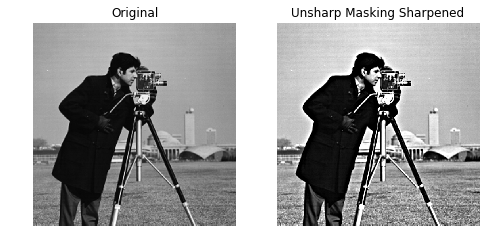

In [7]:
from skimage import data
from skimage import filters
from skimage import img_as_float
import matplotlib.pyplot as plt

unsharp_strength = 0.8
blur_size = 8  # Standard deviation in pixels.

# Convert to float so that negatives don't cause problems
image = img_as_float(data.camera())
blurred = filters.gaussian(image, blur_size)
highpass = image - unsharp_strength * blurred
sharp = image + highpass

fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
axes[0].imshow(image, cmap='gray', interpolation='nearest', vmin=0, vmax=1)
axes[0].axis('off')
axes[0].set_title('Original')

axes[1].imshow(sharp, cmap='gray', interpolation='nearest', vmin=0, vmax=1)
axes[1].axis('off')
axes[1].set_title('Unsharp Masking Sharpened')

plt.show()

## Gradient Operators

Gradient operators are used in image processing within edge detection algorithms. They are discrete differentiation operators, computing an approximation of the gradient of the image intensity function.

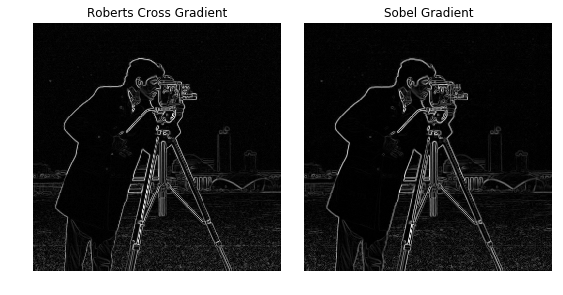

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import camera
from skimage.filters import roberts, sobel

image = camera()
edge_roberts = roberts(image)
edge_sobel = sobel(image)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(8, 4))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Cross Gradient')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Gradient')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()
